# Comp Econ Homework 10

daniel csaba

Uni ID: N12155064

april, 2016

### Matsuyama, Sushko, Gardini -- Globalization and Synchronization of Innovation Cycles [2014]


The following code replicates figure 9a from the above mentioned paper. A very brief summary of the paper follows:

The model demonstrates the effects of globalization on synchronicity of business cycles in a two-country model.

Falling trading costs---globalization---implies that innovation incentives are more alligned as the market environment becomes increasingly common. The aligned incentives cause the endogenous innovation activities in the two countries to be more synchronized, which then leads to synchronized productivity movements.

The following simulation shows how different initial conditions for the inherited competitive varieties---the state variables---determine whether the equilibrium trajectories become synchronized or not. The time it takes to synchronize is also shown.

For falling trading costs---increased globalization---the graphs show that the basin of attraction for the synchronized cycles expands and eventually covers a full measure of the state space.

Meaning of parameters:

**production**

- $\sigma>1$ is the elasticity of demand for monopolists

- $\frac{\sigma}{\sigma - 1}$ is the markup 

- $\theta := \left(\frac{\sigma}{\sigma - 1}\right)^{\sigma-1} \in (1,e)$ ratio of spendings between competitive and monopolistic varieties, measures degree of competition

**trading**

- $\tau \in [1, \infty)$ is the iceberg type trading costs 

- $\rho := \left(\frac{1}{\tau}\right)^{\sigma-1} \in [0,1)$ captures degree of globalization

**dynamics of varieties**

- $n_{t} = (n_{1,t}, n_{2,t})$ normalized measure of varieties in period $t$

- $1-\delta \in (0,1)$ probability of a variety becoming obsolete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Matsuyama:
    """Creates an instant of the economy with given parameters.
    
    Parameters
    ----------
    d: survival rate of monopolistic varieties -- becoming competitive
    theta: ratio of spendings between competitive and monopolistic varieties
    rho: inversely related to trading cost -- measure of globalization
    
    
    Returns
    -------
    Various attributes. Mainly checks for synchronization for different 
    initial conditions.
    """
    
    def __init__(self, d, theta, rho):
        self.d, self.theta, self.rho = d, theta, rho
        
    def h(self, n):
        """Computes the implicitly defined function h
        appearing in the regions.
        Solve the quadratic equation explicitly---we only
        need to care about the root h > 0.
        """
        
        rho = self.rho
        b = n/rho + rho*n -1
        c = n*(n - .5*(1/rho + rho))
        return .5*(-b + np.sqrt(b**2 - 4*c))
    
    def law(self, n1, n2):
        """Define the law of motion for the 2D-system."""
        d = self.d
        theta = self.theta
        
        # Region D_LL
        if n1 <= .5 and n2 <= .5:
            n1_next = d*(theta/2 + (1-theta)*n1)
            n2_next = d*(theta/2 + (1-theta)*n2)
            return [n1_next, n2_next]
        
        # Region D_HH
        elif n1 >= self.h(n2) and n2 >= self.h(n1):
            n1_next = d*n1
            n2_next = d*n2
            return [n1_next, n2_next]
        
        # Region D_HL
        elif n1 >= .5 and n2 <= self.h(n1):
            n1_next = d*n1
            n2_next = d*(theta*self.h(n1) + (1-theta)*n2)
            return [n1_next, n2_next]
        
        # Region D_LH
        elif n2 >= .5 and n1 <= self.h(n2):
            n1_next = d*(theta*self.h(n2) + (1-theta)*n1)
            n2_next = d*n2
            return [n1_next, n2_next]
        
    def path(self, n1, n2, l=500):
        """Generate a 2D sample path of length l for given
        initial conditions n1 and n2."""
        data = np.zeros((2,l))
        data[:,0] = [n1,n2] # set the initial condition
        for t in range(l-1):
            n_next = self.law(n1, n2) # generate next period states
            data[:,t+1] = n_next      # record states
            n1, n2 = n_next           # update states
        return data
    
    def dist(self, data):
        """Computes the distance between the two states for each period."""
        return abs(data[0] - data[1])
    
    
    def synch(self, n1, n2, l=500, tol=.000001):
        """Check if there is synchronization, meaning convergence within tol distance.
        Return time when it happens. If it does not, return nan."""
        
        s = np.where(self.dist(self.path(n1, n2, l)) < tol)
        if s[0].size == 0:
            return np.nan
        else:
            return min(s[0])

In [3]:
# Define parameters

d = .7
theta = 2.5 
rhos = [.2, .4, .6, .8]

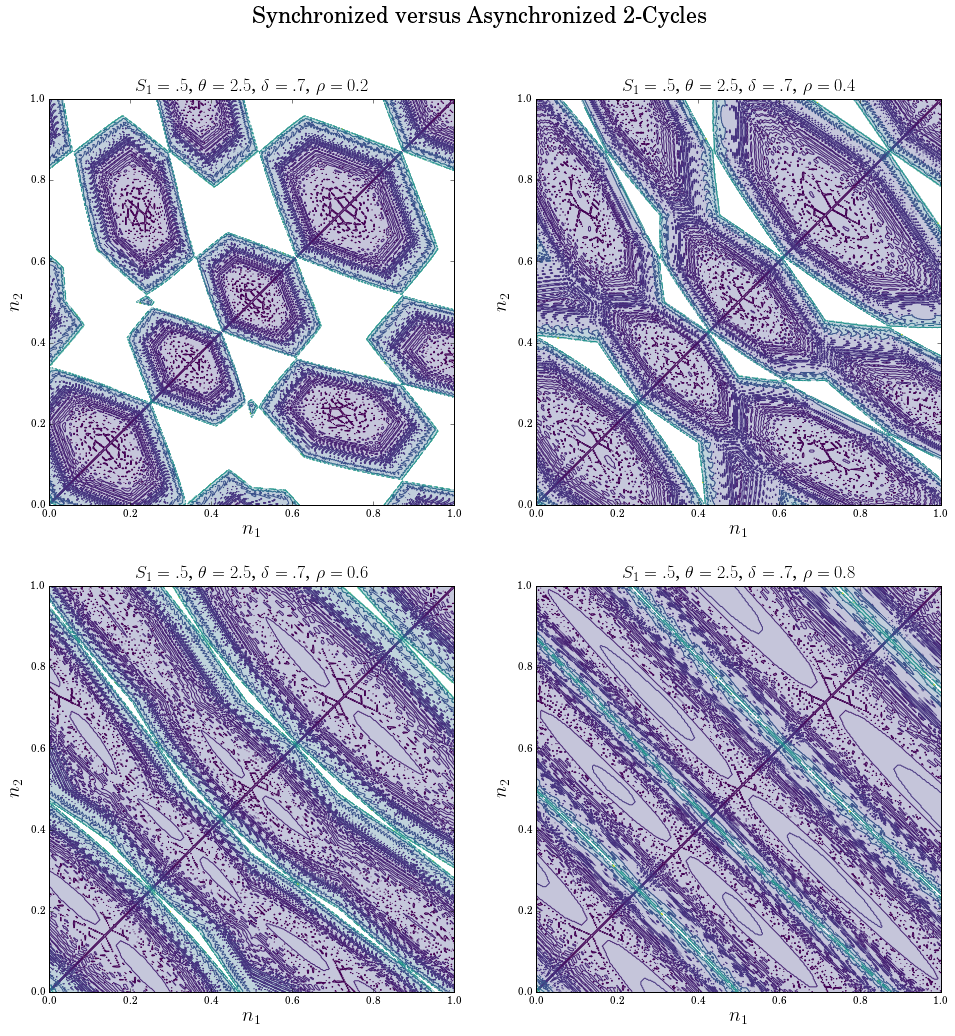

In [4]:
%matplotlib inline
grid = 400
x = np.linspace(0, 1, grid)
y = np.linspace(0, 1, grid)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

levels = [50, 70, 80, 100, 120, 150, 250] # maybe use for contour

for ax, rho in zip(axes.flat, rhos):
    
    Z = np.zeros((grid,grid))
    M = Matsuyama(d, theta, rho)
    for i in range(grid):
        for j in range(grid):
            Z[i][j] = M.synch(X[i][j], Y[i][j], l=500)
    
    ax.contour(X, Y, Z, levels, cmap=plt.cm.viridis)
    ax.contourf(X, Y, Z, alpha = .3, cmap=plt.cm.viridis)
    ax.set_ylabel(r'$n_2$', fontsize = 20)
    ax.set_xlabel(r'$n_1$', fontsize = 20)
    ax.set_title(r'$S_1 = .5$, $\theta=2.5$, $\delta=.7$, $\rho={}$'.format(rho), fontsize=18)
    fig.suptitle("Synchronized versus Asynchronized 2-Cycles", fontsize=22)
plt.show()